# Homework 2

### Kaggle Housing Prices Competition

First, we import any packages and functions that may be useful in cleaning and visualizing the data:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sns.set(style='ticks', palette='Set2')
%matplotlib inline
plt.style.use('seaborn')
pd.set_option('display.max_columns', 500)

## Cleaning Training Data

We now import the training datasets provided by Kaggle:

In [2]:
raw_data = pd.read_csv('train.csv')
print(raw_data.shape)
raw_data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_data = pd.read_csv('test.csv')
print(test_data.shape)
test_data.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


We'll now make some adjustments to the data as a whole, so we have to combine the datasets. This will prevent us from having any formatting problems later.

In [4]:
all_data = pd.concat((raw_data.loc[:,'MSSubClass':'SaleCondition'], 
                        test_data.loc[:,'MSSubClass':'SaleCondition'])) 

all_data1 = all_data
all_data2 = all_data

We need to define some arrays of categorical variables. We'll do this in separate chunks, for reasons which will be explained later.

In [5]:
category_vars = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
                 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
                 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
                 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 
                 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 
                 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 
                 'SaleType', 'SaleCondition']

quality_vars = ['ExterQual', 'ExterCond', 
                 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC',
                 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

Now we'll clean our first dataset. We first create dummies from the categorical variables, then drop all of the excess variables.

In [6]:
for var in category_vars:
    tempdat = pd.get_dummies(all_data1[var], prefix = var)
    all_data1 = pd.concat([all_data1, tempdat], axis = 1)
    
for var in quality_vars:
    tempdat = pd.get_dummies(all_data1[var], prefix = var)
    all_data1 = pd.concat([all_data1, tempdat], axis = 1)

all_data1 = all_data1.drop(category_vars, 1)
all_data1 = all_data1.drop(quality_vars, 1)

all_data1.columns[all_data1.isnull().any()]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

There are now only three variables from our training set with null values. Upon examining the codebook, we see that these are numeric values, so any missing values here are mean that the house does not have that characteristic at all. For "Garage Year Built", we know our other variables show whether a garage actually exists.  Since "Garage Year Built" likely has a minimal effect on housing prices (aside from the year the entire house was built), we will replace this missing value with the year the house was built, and let the other variables related to the garage's qualities (and existence) determine the bulk of the housing price that is determined by the garage. 

For "Lot Frontage" and "Masonry Veneer Area", we will replace this with zero, and create a new variable serving as a dummy for any houses without any area touching the street.

A few other variables have null values, too, but these are from our test data. As such, our model (which will be trained without these variables) will ignore them, and we set them to zero.

In [7]:
values = {'LotFrontage': 0, 'GarageYrBlt': all_data1['YearBuilt'], 'MasVnrArea': 0}
all_data1 = all_data1.fillna(value = values)
all_data1 = all_data1.fillna(value = 0)

We need to scale our data for future use and create our training and testing datasets, which we will do below:

In [8]:
scaler.fit(all_data1)
sc_all_data1 = scaler.transform(all_data1)

y_train = raw_data['SalePrice']
X_train1 = all_data1[:y_train.shape[0]]
X_test1 = all_data1[y_train.shape[0]:]
lny_train = np.log(y_train)

sc_X_train1 = sc_all_data1[:y_train.shape[0]]
sc_X_test1 = sc_all_data1[y_train.shape[0]:]

### Alternative Cleaning Method

In this second training set, we will make a few slight changes. Instead of breaking up the "quality" ratings into separate dummy variable categories, we will rank them from 1-5 (Poor-Excellent). We do this to help with Lasso and Ridge constraints on the variables - with fewer variables describing housing quality, it may be that the scale will actually help general reactions (eg. "Oh this house just looks nicer than the other one") play a larger role in housing prices.

With this exception, we follow the same process as above:

In [9]:
for var in category_vars:
    tempdat = pd.get_dummies(all_data2[var], prefix = var)
    all_data2 = pd.concat([all_data2, tempdat], axis = 1)
    
for var in quality_vars:
    choice_scale = [all_data2[var] =='Ex', all_data2[var] =='Gd', all_data2[var] =='TA', 
                    all_data2[var] =='Fa', all_data2[var] =='Po']
    choices = [5, 4, 3, 2, 1]
    all_data2[str(var) + '_qual'] = np.select(choice_scale, choices, default = np.NaN)

    
all_data2 = all_data2.drop(category_vars, 1)
all_data2 = all_data2.drop(quality_vars, 1)


values = {'LotFrontage': 0, 'GarageYrBlt': all_data2['YearBuilt'], 'MasVnrArea': 0}
all_data2 = all_data2.fillna(value = values)
all_data2 = all_data2.fillna(value = 0)

scaler.fit(all_data2)
sc_all_data2 = scaler.transform(all_data2)

X_train2 = all_data2[:y_train.shape[0]]
X_test2 = all_data2[y_train.shape[0]:]

sc_X_train2 = sc_all_data2[:y_train.shape[0]]
sc_X_test2 = sc_all_data2[y_train.shape[0]:]





## Description and Visualization

First, we look at the sale price distribution. This will be the same for both train1 and train2, so we'll just examine it once:

Text(0.5,0,'Sale Price, Dollars')

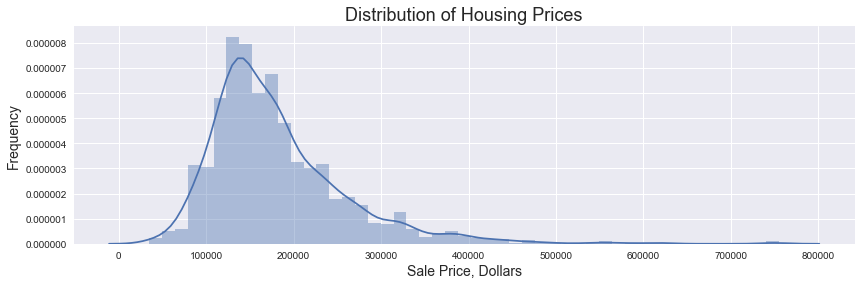

In [10]:
f, ax = plt.subplots(figsize = (14,4))
ax.set_title("Distribution of Housing Prices", fontsize = 18)
sns.distplot(y_train, ax = ax)
plt.ylabel("Frequency", fontsize = 14)
plt.xlabel("Sale Price, Dollars", fontsize = 14)

This appears to be approximately distributed as a log-normal distribution. We examine the distribution of the log of sales price and note that it appears to be normal. Predicting on a logarithmic scale may help with outlier prediction.

Text(0.5,0,'Natural Log of Sale Price, Dollars')

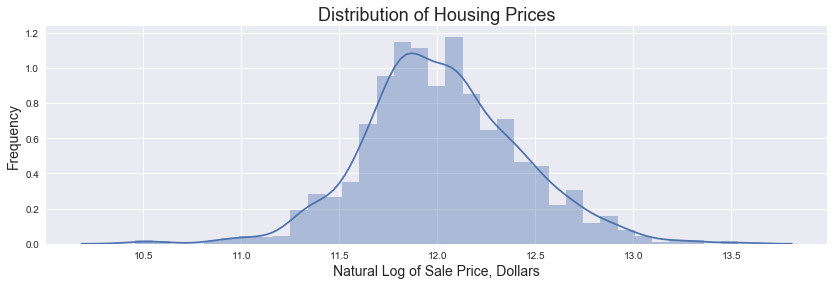

In [11]:
f, ax = plt.subplots(figsize = (14,4))
ax.set_title("Distribution of Housing Prices", fontsize = 18)
sns.distplot(lny_train, ax = ax)
plt.ylabel("Frequency", fontsize = 14)
plt.xlabel("Natural Log of Sale Price, Dollars", fontsize = 14)

In [12]:
X_train1.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,Sa

In [13]:
X_train2.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,Sa

# Modeling

Now that we've cleaned our data, we import a few things that will be useful in modeling the data.

In [14]:
from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.linear_model import SGDRegressor as SGDR
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import ElasticNetCV as ENCV
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.model_selection import cross_val_predict as CVP
from sklearn.tree import DecisionTreeRegressor as DTR

We can now format our data in a way that will be compatible with SciKit Learn's programs. We have made two different outcomes, the Sale Price and the natural log of the Sale Price, and will be modeling with both (and calculating the Mean Squared Error for the "LN" variable only after raising it as a power of "e" to get the true price - we want to see if the linear variables have a different effect when the outcome data is scaled differently).

Remember - we have two different datasets based upon two different cleaning methods. We'll loop through the same regressions for each and see which way is better for predicting the housing prices.

## Model 1 - Linear Regression

### Simple Linear Model

We start off with a linear regression model. Just to check to make sure our linear model is working correctly, we'll examine how it runs with our normal and transformed outcome variables, as well as our two different datasets (created, as explained above, with either dummies or a scale rating for certain variables).

A linear model is beneficial because it is simple - it is computationally easy and fast, and its coefficients provide easily understandable results (showing how a per-unit increase in one characteristic affects the total outcome, all else being equal). It assumes that all variables have a linear relationship with the outcome, which for housing prices, we expect to be roughly true (at the very least, a relationship would be strictly positive or negative, perhaps with marginal effects).

#### Sample Linear Models

Below, we set a linear model to run a Stochastic Gradient Descent Regression. At the moment, we have set a tolerance level of .0000001 and a learning rate of .000000001 (the log-linear model has problems for higher learning rates). These are somewhat arbitrary - we just want to make sure the code works, and we need a low tolerance level and slow learning rate to make sure the model has a chance of converging. We'll fine-tune this later.

We will return the RMSE, or Root Mean Squared Error, as this shows us the error in the scale of our predicted outcome.

In [15]:
linear_model = SGDR(tol=.0000001, eta0=.000000001)

In [16]:
linear_model.fit(X_train1, y_train)
predicted_y1 = linear_model.predict(X_train1)
mse1 = MSE(y_train, predicted_y1)
print("RMSE: {}".format(np.sqrt(mse1)))

RMSE: 56705.34157327995


In [17]:
linear_model.fit(X_train2, y_train)
predicted_y2 = linear_model.predict(X_train2)
mse2 = MSE(y_train, predicted_y2)
print("RMSE: {}".format(np.sqrt(mse2)))

RMSE: 56326.2497137371


In [18]:
linear_model.fit(X_train1, lny_train)
predicted_lny1 = linear_model.predict(X_train1)
predicted_lny1 = np.exp(predicted_lny1)
mseln1 = MSE(y_train, predicted_lny1)
print("RMSE: {}".format(np.sqrt(mseln1)))

RMSE: 587088.3991022431


In [19]:
linear_model.fit(X_train2, lny_train)
predicted_lny2 = linear_model.predict(X_train2)
predicted_lny2 = np.exp(predicted_lny2)
mseln2 = MSE(y_train, predicted_lny2)
print("RMSE: {}".format(np.sqrt(mseln2)))

RMSE: 3173349.4058266245


The code appears to be working just fine. However, we have just chosen arbitrary hyperparameters - it may be that our regression is not even converging to a set of parameters, let alone the "true" parameters. We can tell that the different datasets result in different RMSEs, although we have not done a rigorous test to see which model is best, and which parameters work best for our model. We'll get to that below.

#### Grid Search

With a grid search, we can fine-tune our parameters for each model and find the optimal one. We first set up a dictionary of parameters, where our learning rate and tolerance levels are tested to find the best combination for each model. We here test a number of learning rates and tolerance levels, each different by some factor of 10. This allows us to test a wide variety of hyperparameters while still maintaining some sort of pattern while doing so.

We then use a Stochastic Gradient Descent Regression, as before, but this time we add Cross-Validation to our model. By setting this option to 5, we break our dataset of 1460 observations into 5 groups, each containing almost 300 houses. We then test our models' predictive abilities by trying to predict the housing prices of the houses in the remaining set. This means the model will loop through the data 5 times to find the best model, as determined by the negative MSE of the model's cross-validated test set.

In [20]:
param_g = {"eta0": [.000000001, .00000001, .0000001, .000001, .00001, .0001], 
           "tol": [.0001, .00001, .000001, .0000001]}
linear_model_grid = SGDR()
grid_search = GSCV(linear_model_grid, param_grid = param_g,
                     cv = 5, scoring = 'neg_mean_squared_error')

Now that we have our Grid Search function set up, we can test it on each of the models. One word of caution - the negative RMSE in the third and fourth regressions is extremely close to zero because we have scaled the housing prices by taking their natural log. In our actual predictions, later, we can transform the predicted values back and get a more accurate MSE (in dollars, without scaling), but for now, it is sufficient to see that these are the best parameters for each dataset.

In [21]:
grid_search.fit(X_train1, y_train)
print("Model with Untransformed Sale Prices, Dataset 1")
print("Best Parameters: {}".format(grid_search.best_params_))
print("Best RMSE: {}".format(np.sqrt(-1 * grid_search.best_score_)))
print("")

grid_search.fit(X_train2, y_train)
print("Model with Untransformed Sale Prices, Dataset 2")
print("Best Parameters: {}".format(grid_search.best_params_))
print("Best RMSE: {}".format(np.sqrt(-1 * grid_search.best_score_)))
print("")

grid_search.fit(X_train1, lny_train)
print("Model with LN Sale Prices, Dataset 1")
print("Best Parameters: {}".format(grid_search.best_params_))
predicted = grid_search.predict(X_train1)
predicted = np.exp(predicted)
mse = MSE(y_train, predicted)
print("Best RMSE: {}".format(np.sqrt(mse)))
print("")

grid_search.fit(X_train2, lny_train)
print("Model with LN Sale Prices, Dataset 2")
print("Best Parameters: {}".format(grid_search.best_params_))
predicted = grid_search.predict(X_train2)
predicted = np.exp(predicted)
mse = MSE(y_train, predicted)
print("Best RMSE: {}".format(np.sqrt(mse)))

Model with Untransformed Sale Prices, Dataset 1
Best Parameters: {'eta0': 1e-09, 'tol': 0.0001}
Best RMSE: 56803.11657292142

Model with Untransformed Sale Prices, Dataset 2
Best Parameters: {'eta0': 1e-09, 'tol': 1e-07}
Best RMSE: 54655.21446812661

Model with LN Sale Prices, Dataset 1
Best Parameters: {'eta0': 1e-09, 'tol': 1e-07}
Best RMSE: 73830373.77800636

Model with LN Sale Prices, Dataset 2
Best Parameters: {'eta0': 1e-09, 'tol': 1e-06}
Best RMSE: 6381194.652518146


After testing a few parameters, we finally have some candidates for parameters in our "final" model. Still, there are more models we can test.  As we continue to explore models to use to better predict housing prices, we will continue to incorporate grid searches and cross-validation, as previously explained.  These tools will help us to select the best model possible.

It looks like a linear model performs quite poorly when scaling and re-scaling the price using a natural log - the Root Mean Squared Error is much higher than for a simple model. Still, we'll keep the "lny_train" vector around for now - it should come in handy in the near future.

## Model 2 - Elastic Net Regression

Now we can run our elastic net model with our scaled data. For this, we will only predict based on our lny_train vector, as there are convergence issues when using the y_train vector. Below, we set our possible hyperparameters (using those suggested by the SKLearn website for the L1 ratio). We also have our model cross-validate with 5 folds, as before.

In [22]:
enet = ENCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.1, 1, 10, 100], cv = 5)

Below, we'll try something in addition to just our model. Housing prices tend to cluster around "nice" numbers - for example, instead of people buying a house for \$249,926, they would buy one for just \$250,000. To see if we can improve upon our predictions, we'll try rounding our data to the nearest 500 and nearest 1000.

In [23]:
enet.fit(sc_X_train1, lny_train)
train1_predictions = enet.predict(sc_X_train1)
train1_predictions = np.exp(train1_predictions)
print("Train1 RMSE: {}".format(np.sqrt(MSE(y_train, train1_predictions))))

train1_predictions_norm = train1_predictions / 5
train1_predictions_norm = np.round(train1_predictions_norm, -2)
train1_predictions_norm = train1_predictions_norm * 5
print("Train1 RMSE (rounded to 500): {}".format(np.sqrt(MSE(y_train, train1_predictions_norm))))

train1_predictions_norm = np.round(train1_predictions, -3)
print("Train1 RMSE (rounded to 1000): {}".format(np.sqrt(MSE(y_train, train1_predictions_norm))))

print("")
print("")

enet.fit(sc_X_train2, lny_train)
train2_predictions = enet.predict(sc_X_train2)
train2_predictions = np.exp(train2_predictions)
print("Train2 RMSE: {}".format(np.sqrt(MSE(y_train, train2_predictions))))

train2_predictions_norm = train2_predictions / 5
train2_predictions_norm = np.round(train2_predictions_norm, -2)
train2_predictions_norm = train2_predictions_norm * 5
print("Train2 RMSE (rounded to 500): {}".format(np.sqrt(MSE(y_train, train2_predictions_norm))))

train2_predictions_norm = np.round(train2_predictions, -3)
print("Train1 RMSE (rounded to 1000): {}".format(np.sqrt(MSE(y_train, train2_predictions_norm))))

Train1 RMSE: 23547.781854049124
Train1 RMSE (rounded to 500): 23543.87628461973
Train1 RMSE (rounded to 1000): 23544.725863448304


Train2 RMSE: 24005.57175241783
Train2 RMSE (rounded to 500): 24005.31265882503
Train1 RMSE (rounded to 1000): 24008.276075022975


A few observations before we continue. The first and second datasets (with different cleaning methods) are fairly comparable in their predictive ability, and which is "better" depends on the model. It is also interesting to note that rounding has little, if any, benefit in reducing our RMSE.  This suggests that our model is relatively good at predicting the true prices (since our RMSE is around 24000 with both datasets, and houses are quite expensive, that's also a good sign).

## Model 3 - Decision Tree Regression

We can now try to use a decision tree regression. Although this is a complicated dataset, and decision trees aren't great at predicting, it's worth exploring. Maybe the categorical data will help this be a more predictive model.

We'll start off with two different decision tree regressions, with maximum depths of 2 and 5, and see how that goes with our two datasets, when predicting on our untransformed variable and our log-transformed variable (before switching back to dollar amounts to get an MSE we can compare to the untransformed model).

In [24]:
regr_1 = DTR(max_depth=2)
regr_2 = DTR(max_depth=5)

print("First Dataset (Categorical Variables):")
print("")
regr_1.fit(X_train1, y_train)
predicted_y1 = regr_1.predict(X_train1)
mse1 = MSE(y_train, predicted_y1)
print("Depth 2, RMSE: {}".format(np.sqrt(mse1)))

regr_2.fit(X_train1, y_train)
predicted_y2 = regr_2.predict(X_train1)
mse2 = MSE(y_train, predicted_y2)
print("Depth 5, RMSE: {}".format(np.sqrt(mse2)))


# Logs
regr_1.fit(X_train1, lny_train)
predicted_y1 = regr_1.predict(X_train1)
predicted_y1 = np.exp(predicted_y1)
mse1 = MSE(y_train, predicted_y1)
print("LogY Depth 2, RMSE: {}".format(np.sqrt(mse1)))

regr_2.fit(X_train1, lny_train)
predicted_y2 = regr_2.predict(X_train1)
predicted_y2 = np.exp(predicted_y2)
mse2 = MSE(y_train, predicted_y2)
print("LogY Depth 5, RMSE: {}".format(np.sqrt(mse2)))

print("")
print("")
print("")

print("Second Dataset (Scale Variables):")
print("")
regr_1.fit(X_train2, y_train)
predicted_y1 = regr_1.predict(X_train2)
mse1 = MSE(y_train, predicted_y1)
print("Depth 2, RMSE: {}".format(np.sqrt(mse1)))

regr_2.fit(X_train2, y_train)
predicted_y2 = regr_2.predict(X_train2)
mse2 = MSE(y_train, predicted_y2)
print("Depth 5, RMSE: {}".format(np.sqrt(mse2)))


# Logs
regr_1.fit(X_train2, lny_train)
predicted_y1 = regr_1.predict(X_train2)
predicted_y1 = np.exp(predicted_y1)
mse1 = MSE(lny_train, predicted_y1)
print("LogY Depth 2, RMSE: {}".format(np.sqrt(mse1)))

regr_2.fit(X_train2, lny_train)
predicted_y2 = regr_2.predict(X_train2)
predicted_y2 = np.exp(predicted_y2)
mse2 = MSE(lny_train, predicted_y2)
print("LogY Depth 5, RMSE: {}".format(np.sqrt(mse2)))

First Dataset (Categorical Variables):

Depth 2, RMSE: 48069.23940764968
Depth 5, RMSE: 29517.533942048587
LogY Depth 2, RMSE: 50037.262591859224
LogY Depth 5, RMSE: 30871.308500359886



Second Dataset (Scale Variables):

Depth 2, RMSE: 48069.23940764968
Depth 5, RMSE: 29557.784753855976
LogY Depth 2, RMSE: 185208.23462626684
LogY Depth 5, RMSE: 192744.19328601315


We see that, in this model, using our LogY data is worse than our untransformed data (significantly so for the second dataset). We can also tell that similar results are produced with each dataset, and that an increased depth does allow for a better fit. However, we must be wary of exposing ourselves to overfitting. Running a similar regression with a depth of 25 confirms that overfitting is a serious danger: 

In [25]:
regr_3 = DTR(max_depth=25)
regr_3.fit(X_train1, y_train)
predicted_y3 = regr_3.predict(X_train1)
mse3 = MSE(y_train, predicted_y3)
print("Depth 25, RMSE: {}".format(np.sqrt(mse3)))

Depth 25, RMSE: 76.25253345592846


While we would love for our model to be this accurate for any set of data, it's unlikely that it will not be so biased when trying to predict other values. For this purpose, we'll now use a cross-validate-predict function to ensure we don't overfit.

In [26]:
columns = ["Max Depth","RMSE"]
best_depth = pd.DataFrame(columns = columns, index = (1,35))


for i in range(1, 36):
    dtreg = DTR(max_depth = i, random_state=0)
    predicted = CVP(dtreg, X_train1, y_train, cv=5)
    mse = MSE(y_train, predicted)
    rmse = format(np.sqrt(mse))
    best_depth.loc[i, "RMSE"] = rmse
    best_depth.loc[i, "Max Depth"] = i

best_depth["RMSE"] = pd.to_numeric(best_depth["RMSE"])
best_depth["Max Depth"] = pd.to_numeric(best_depth["Max Depth"])
best_depth = best_depth.drop(35, 0)

Now we can plot our results, just to see how beneficial it is to increase the maximum depth.

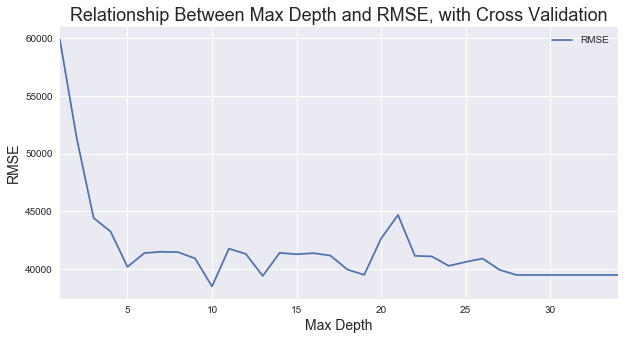

In [27]:
f, ax = plt.subplots(figsize = (10, 5))

ax.set_ylabel("RMSE", fontsize = 14)
ax.set_xlabel("Max Depth", fontsize = 14)
ax.set_title("Relationship Between Max Depth and RMSE, with Cross Validation", fontsize = 18)
best_depth.plot.line(x = 'Max Depth', y = 'RMSE', ax = ax)
plt.show()

Despite initial benefits to increasing the max depth, it looks like our decision tree regression doesn't do too much better after after increasing the maximum depth past 10. We'll examine this in further detail below, and find that 10 seems to be the optimal maximum depth for this model (there's no real return in predictive power to setting it much higher).

In [28]:
dtreg = DTR(max_depth = 6, random_state=0)
predicted = CVP(dtreg, X_train1, y_train, cv=5)
mse = MSE(y_train, predicted)
print("RMSE, depth 6: {}".format(np.sqrt(mse)))

dtreg = DTR(max_depth = 7, random_state=0)
predicted = CVP(dtreg, X_train1, y_train, cv=5)
mse = MSE(y_train, predicted)
print("RMSE, depth 7: {}".format(np.sqrt(mse)))

dtreg = DTR(max_depth = 8, random_state=0)
predicted = CVP(dtreg, X_train1, y_train, cv=5)
mse = MSE(y_train, predicted)
print("RMSE, depth 8: {}".format(np.sqrt(mse)))

dtreg = DTR(max_depth = 9, random_state=0)
predicted = CVP(dtreg, X_train1, y_train, cv=5)
mse = MSE(y_train, predicted)
print("RMSE, depth 9: {}".format(np.sqrt(mse)))

dtreg = DTR(max_depth = 10, random_state=0)
predicted = CVP(dtreg, X_train1, y_train, cv=5)
mse = MSE(y_train, predicted)
print("RMSE, depth 10: {}".format(np.sqrt(mse)))

dtreg = DTR(max_depth = 11, random_state=0)
predicted = CVP(dtreg, X_train1, y_train, cv=5)
mse = MSE(y_train, predicted)
print("RMSE, depth 12: {}".format(np.sqrt(mse)))

RMSE, depth 6: 41399.18343431803
RMSE, depth 7: 41508.60918465333
RMSE, depth 8: 41474.366301853006
RMSE, depth 9: 40932.24606219776
RMSE, depth 10: 38507.29264328607
RMSE, depth 12: 41774.47864951466


# Prediction

Now it's time to synthesize what we've learned so far, and choose the best model to predict our housing prices.

### Test Data

We have two test datasets, with categorical and quality variables comparable to those of our two training datasets.

In [29]:
X_test1.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,Sa

In [30]:
X_test2.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,Sa

### Choosing a Model

We have already explored a few different models. Since Elastic Net is the best we've seen so far, we'll examine a few more possible parameters to get as close as possible. We'll start off with our two datasets and see which is a better predictor.

In [31]:
enet = ENCV(l1_ratio=[.01, .05, .1, .2, .35, .5, .65, .8, .9, .95, .99, 1], alphas=[.01, .05, .1, .2, .5, .7, 1, 2, 5, 7, 10, 20, 50, 70, 100], cv = 5)

enet.fit(sc_X_train1, lny_train)
train1_predictions = enet.predict(sc_X_train1)
train1_predictions = np.exp(train1_predictions)
print("Train1 RMSE: {}".format(np.sqrt(MSE(y_train, train1_predictions))))

enet.fit(sc_X_train2, lny_train)
train2_predictions = enet.predict(sc_X_train2)
train2_predictions = np.exp(train2_predictions)
print("Train2 RMSE: {}".format(np.sqrt(MSE(y_train, train2_predictions))))

Train1 RMSE: 20090.11895170563
Train2 RMSE: 20740.45355637103


Text(0,0.5,'Important Factors')

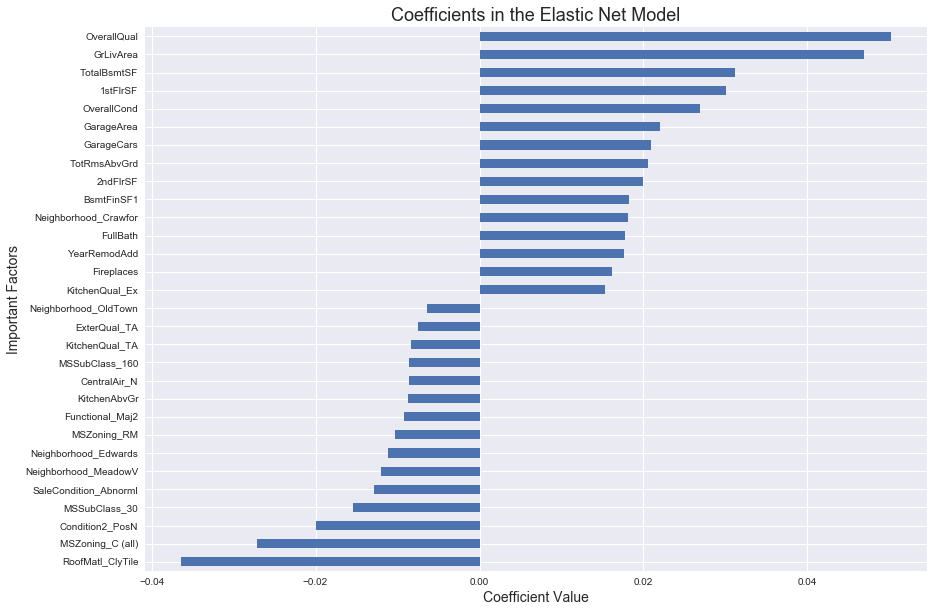

In [32]:
enet = ENCV(l1_ratio=[.01, .05, .1, .2, .35, .5, .65, .8, .9, .95, .99, 1], alphas=[.01, .05, .1, .2, .5, .7, 1, 2, 5, 7, 10, 20, 50, 70, 100], cv = 5)
enet.fit(sc_X_train1, lny_train)
train1_predictions = enet.predict(sc_X_train1)
train1_predictions = np.exp(train1_predictions)

coef = pd.Series(enet.coef_, index = X_train1.columns)
important_coef = pd.concat([coef.sort_values().head(15), coef.sort_values().tail(15)])
mpl.rcParams['figure.figsize'] = (14.0, 10.0)
important_coef.plot(kind = "barh")
plt.title("Coefficients in the Elastic Net Model", fontsize = 18)
plt.xlabel("Coefficient Value", fontsize = 14)
plt.ylabel("Important Factors", fontsize = 14)

In [33]:
test_predictions = enet.predict(sc_X_test1)
test_predictions = np.exp(test_predictions)

Below, before finalizing our predictions, we can check the distribution of the housing prices we predicted compared to the actual ones. We would expect them both to have a log-normal distribution, and hope that the shape is similar throughout.

Text(0.5,0,'Distributions of Prices, Predicted vs. Real (Training)')

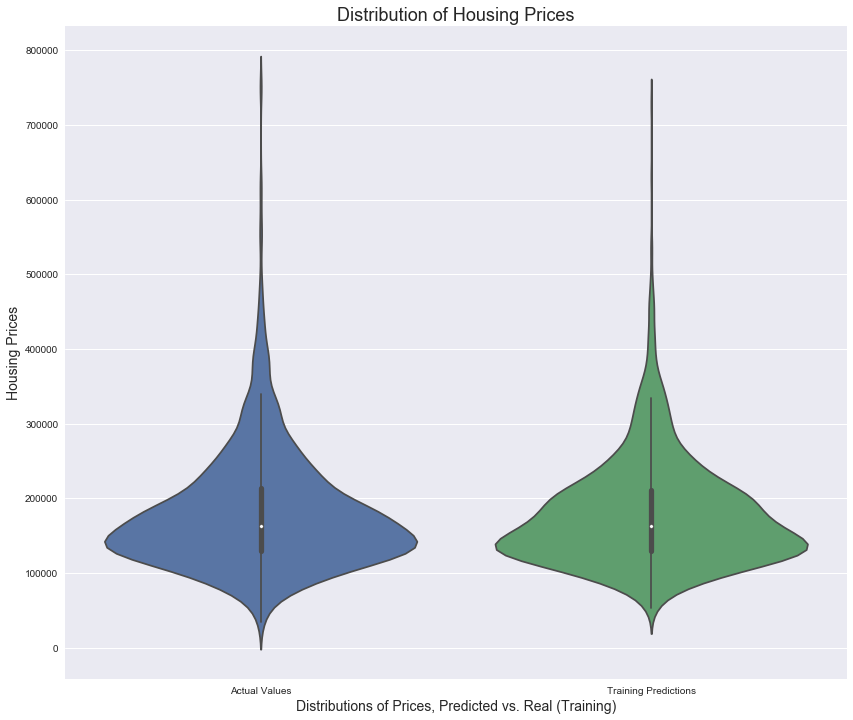

In [34]:
prediction_df = pd.DataFrame({'Training Predictions': train1_predictions, 'Actual Values': y_train})

f, ax = plt.subplots(figsize = (14,12))
ax.set_title("Distribution of Housing Prices", fontsize = 18)
sns.violinplot(data = prediction_df, ax = ax, scale = "width")
plt.ylabel("Housing Prices", fontsize = 14)
plt.xlabel("Distributions of Prices, Predicted vs. Real (Training)", fontsize = 14)

Our trained data is less smooth at parts, but matches remarkably well. It underestimates some of the outliers by just a bit, making the body of the violin plot a little fatter than it should be in reality.

We can't compare our predicted values to the true values, but this is comforting - by using the same model, we get a distribution that is similar, as shown below:

Text(0.5,0,'Distributions of Prices, Predicted vs. Real (Training)')

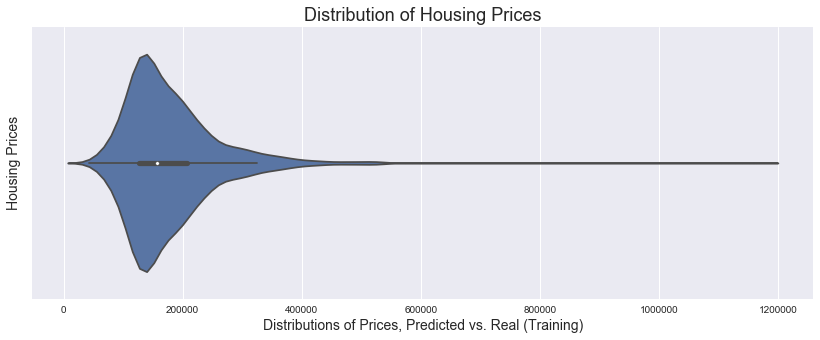

In [35]:
prediction_df = pd.DataFrame({'Testing Predictions': test_predictions})

f, ax = plt.subplots(figsize = (14,5))
ax.set_title("Distribution of Housing Prices", fontsize = 18)
sns.violinplot(x = prediction_df, ax = ax)
plt.ylabel("Housing Prices", fontsize = 14)
plt.xlabel("Distributions of Prices, Predicted vs. Real (Training)", fontsize = 14)

We can see that we have another log-normal distribution, with some clear outliers. The peak of the distribution matches up with the peak in the training actual and predicted data, which is good to see.

Of course, our model operates on the assumption that this is a similar housing market, if not the same. If the actual test data is from a similar distribution and consumers react similarly to the characteristics of houses, we should see fairly close results.

The RMSE is not too bad, either - with an RMSE of just over \$20,000, the total error of the model isn't all that great. Housing markets depend largely upon realtors and negotiations, so these prices are intended to be more of a starting point than anything. A company such as Zillow should feel comfortable with this margin of error, as the estimates are made to be more of a basic indicator to potential buyers rather than an official evaluation done by a real estate agency or bank. Other factors could be observed and incorporated, such as school quality, noise pollution, and proximity to shopping centers or restaurants (further than that which is shown by some basic geographic variables included) to provide a better estimate of the true desirability of a house, which are likely more predictive than some of the more specific attributes listed (like square feet of masonry) and easier to gather.

In [36]:
ps2_submit = pd.DataFrame({'Id': test_data.Id, 'SalePrice': test_predictions})
ps2_submit.to_csv('ps2_submission.csv', index=False)